<h1>Data Science Capstone Project - The Battle of Neighborhoods (Week 1-2)

<h2>Business Problem

<b>Background</b>

When you live in a big city like London or New York, its relatively easy to figure out where to go for some amzing restaurants, or banging street food in the cuisine of your choice, or what to do when you have a few hours to kill?  But when you live in a much smaller city (as most of us do!), the choice is less and often the decisions are harder.  There aren't many guides or websites for smaller cities.  When you are visiting a place for a first time, wouldn't it be great to figure out the happening neighborhoods or boroughs to hang out, or where to go for the best restaurants?

Now actually this is an easier problem when you have lots of data, and bigger cities also have much more wrangled data available....but with smaller cities, the data acquisition and wrangling is much harder, and there is less data to be statisitically relevant.  


<b>Problem : *Where to go in smaller cities when there are no-online guides?*</b>


In the 1960s, the UK Government decided that a further generation of new towns in the South East of England was needed to relieve housing congestion in London. This new town (in planning documents, "new city"), <b>Milton Keynes</b>, was to be the biggest yet, with a target population of 250,000 and a "designated area" of about 22,000 acres (9,000 ha). At designation, its area incorporated the existing towns of Bletchley, Wolverton, and Stony Stratford, along with another fifteen villages and farmland in between.

I live in this amazing city and wondered **whether data science could teach me a thing a or two about the place I have lived in** for the last 25 years? 

But more specifically,  if you were a visitor to to my home town; 
* What would be the areas within the city you would goto, for a range of different activities?  
* Where would you go if you wanted a range of fast food outlets?  
* Where do you go for the best Supermarkets and food shops?  
* Which parts of the city have the best museums?  

**So could data science shed light on where to go in a city of 250,000 people?**

...and for those of you who have never heard of Milton Keynes, its here:

<img src="http://www.worldeasyguides.com/wp-content/uploads/2014/08/Where-is-Milton-Keynes-on-map-England.jpg" width="400" height="400" align="left"/>


<h2>Data Section

**Data Understanding**

In a city of 250,000 people covering 100 km squared, we're going to need to chunk up the city into small enough areas to be explored yet big enough to be of interest.  In the UK we use postcode (similar to ZIP codes) to segment each area.  Typically postcodes are 6 or 7 characters (eg. MK7 8AA) which go down to a level of 10-15 houses.  That will be too granular for our analysis, so we will use a higher level of the postcodes going to just 3 or 4 characters (eg. MK7 or MK78) to give us a postal region cover a few square kilometers each.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/MK_postcode_area_map.svg/1100px-MK_postcode_area_map.svg.png" width="400" height="400" align="left"/>

**Data Collection**

There are THREE main sources of data that we will need for our analysis:

* Neighbourhood or Borough data, of all of the regions within Milton Keynes
* Location coordinate data within the Boroughs so that we can search for venues around a locale
* Venue information, its location and classification

For the **Neighbourhood data**, the internet is our friend, and we should be able to get this from wikipedia.  Actually our good friends at wikipedia have posted a list of all of the major postal code towns, their major post codes, and neighborhoods within.  Since its in wikipedia, we can screen scrape it, and transform it into a dataframe!  https://en.wikipedia.org/wiki/MK_postcode_area

For the **Location Coordinates**, the UK Government's Office for National Statistics (https://www.ons.gov.uk/) publishes much data for each postal code, such as the income levels, the OS grid references, the parliamentary constituency, and for our purposes, the longitude and lattitude of each postcode.  Now a 6/7-digit postcode is going to be too granular for our purposes, so some data wrangling and aggregation will be in order.  ONS publish these files regularly in CSV format.  We will get our data from here:  https://geoportal.statistics.gov.uk/datasets/national-statistics-postcode-lookup-may-2020  (example below)

<img src="https://raw.githubusercontent.com/brian-naylor/Coursera_Capstone/master/ONS%20Postcode%20Data%20-%20May%202020.jpg" width="600" height="600" align="left"/>

Finally, for the venue and point of interest information, our good friend **Foursquare** can come to the rescue, where we will leverage their **API to perform venue exploration** around a given longitude and lattitude to see what we find.  (e.g. https://foursquare.com/explore?mode=url&ne=52.093746%2C-0.52434&q=Food&sw=51.965952%2C-0.846891)

<img src="https://raw.githubusercontent.com/brian-naylor/Coursera_Capstone/master/FoursquareinMK.jpg" width="600" height="600" align="left"/>

**Data Wrangling**

There is going to need to be considerable cleaning, filtering and agregation of data before we can model the outcomes.  We will be combining approximately 20 different regions in Milton Keynes, with data from about 20,000 postcodes, and somewhere in the region of about 400-800 points of interest and venues in Milton Keynes.

***

<h2>Methodology

We're going to follow a standard CRISP-DM approach, as shown in the diagram below.

<img src="https://miro.medium.com/max/1400/1*2NajmK58hJf8lJQm25iXWw.png" width="400" height="400" align="left"/>

With the **Business Problem** and **Data Understanding / Collection** described above, lets focus a little on the **Modelling** part.  Since we are trying to understand what parts of the city are best to visit for specific categories, we are going to need to apply some clustering techniques to the venues, to determine their common characteristics, and what would make sense to group them together into a set of clusters.  Also, the number of clusters is going to be far less than the number of boroughs/regions, otherwise we might as well just say "go to postcode region XX for the best chinese food restaurants."  

So we will need to identify all the relevant venues within the regions of interest, determine their relative importance or density within each region, and then apply clustering techniques to group them together.  We will obviously need to plot them to visualise the results, and then evaluate to see whether they make sense.

**Tooling**

Its also important to consider the tooling, and we will be using the following;
* Watson Studio, for cloud-based Notebooks
* IBM Cloud Object Storage for any files we load (and save)
* Github for sharing the published results (in my personal repo https://github.com/brian-naylor/Coursera_Capstone)
* Within Notebooks, we're likely to make extensive use of Pandas for dataframe manipulation, Folium for visualisation, and Geocode for location plotting

***

<h1>Week 2 - The Data Science bit!

First off, lets get all the libraries we will need

* Pandas for Dataframes and wrangling
* Beautiful Soup for web page scraping
* K-Means for clustering
* Json for json post processing from API calls
* Folium for mapping and visualisation
* Geocode/Geopy for mapping locations
* NumPy for various math functions

In [1]:
#import libraries

import pandas as pd
import requests
from bs4 import BeautifulSoup

# import k-means from clustering stage
from sklearn.cluster import KMeans

#import data handling libs to retrieve files from IBM Cloud Object Storage
import types
from botocore.client import Config
import ibm_boto3
from project_lib import Project

from geopy.geocoders import Nominatim

from pandas.io.json import json_normalize

import numpy as np # library to handle data in a vectorized manner
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [4]:
#These ones take some time to get imported
!conda install -c conda-forge folium

import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.11.0              |             py_0          61 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    branca:          0.4.1-py_0        conda-forge
    folium:          

<h3>Data Collection

Lets get our first dataset of the postal code regions in an around Milton Keynes, from https://en.wikipedia.org/wiki/MK_postcode_area

In [5]:
#Scrape from wikipedia, all the postal code districts for Milton Keynes in the UK
url = "https://en.wikipedia.org/wiki/MK_postcode_area"
res = requests.get(url)
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[1] 
mk_pc = pd.read_html(str(table))
mk1_df = mk_pc[0]
mk1_df.rename(columns={'Postcode district':'Postcode','Post town':'Town', 'Coverage':'Borough'}, inplace=True)
mk1_df = mk1_df[mk1_df['Town']=='MILTON KEYNES']
mk1_df = mk1_df[mk1_df['Postcode']!='MK77']  #we're excluding MK77, as its a specific company postcode, not a region.
mk1_df.set_index('Postcode')
mk1_df

,Postcode,Town,Borough,Local authority area(s)
0,MK1,MILTON KEYNES,"Denbigh, Mount Farm",Milton Keynes
1,MK2,MILTON KEYNES,"Brickfields, Central Bletchley, Fenny Stratfor...",Milton Keynes
2,MK3,MILTON KEYNES,"Church Green, Far Bletchley, Old Bletchley, Ne...","Milton Keynes, Aylesbury Vale"
3,MK4,MILTON KEYNES,"Emerson Valley, Furzton, Kingsmead, Oxley Park...","Milton Keynes, Aylesbury Vale"
4,MK5,MILTON KEYNES,"Crownhill, Elfield Park, Grange Farm, Oakhill,...",Milton Keynes
5,MK6,MILTON KEYNES,"Ashland, Beanhill, Bleak Hall, Coffee Hall, Ea...",Milton Keynes
6,MK7,MILTON KEYNES,"Browns Wood, Caldecotte, Kents Hill, Tilbrook,...",Milton Keynes
7,MK8,MILTON KEYNES,"Crownhill, Grange Farm, Great Holm, Hazeley, L...",Milton Keynes
8,MK9,MILTON KEYNES,"Central Milton Keynes, Campbell Park",Milton Keynes
9,MK10,MILTON KEYNES,"Brinklow, Broughton, Kingston, Middleton, Monk...",Milton Keynes


Next, we will get the ONS data for all of the postcodes in the UK, then wrangle the data to just the columns we need.  

We are using IBM Cloud Object storage to hold the file, so first we need the credential to connect and retrieve the file

Source: https://geoportal.statistics.gov.uk/datasets/national-statistics-postcode-lookup-may-2020 

In [6]:
#Get the CSV file with the Long / Lattitude for the Postcodes.  Source from the UK Govt . ONS service

def __iter__(self): return 0

# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ZZZZ = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XXXX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ZZZZ.get_object(Bucket='datasciencecapstone-donotdelete-pr-nlrk7iuezqw3t1',Key='NSPL_MAY_2020_UK_MK.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pc_df = pd.read_csv(body)
pc_df = pc_df.drop(columns=['dointr','doterm','usertype','oseast1m','osnrth1m','osgrdind','oa11','cty','ced','laua','ward','hlthau','nhser','ctry'])
pc_df = pc_df.drop(columns=['lep1','lep2','pfa','calncv','stp','rgn','pcon','eer','teclec','ttwa','pct','nuts','park', 'lsoa11', 'msoa11', 'wz11', 'ccg', 'bua11', 'buasd11', 'imd'])
pc_df['pcds'] = pc_df['pcd2'].str.split(' ').str[0]
pc_df.rename(columns={'pcds':'Postcode'}, inplace=True)

#We also need to filter out some erroroneous postcodes where the lat = 99!  These are actually company locations, not venues.
pc_df = pc_df[pc_df['lat']<60]
pc_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pcd,pcd2,Postcode,ru11ind,oac11,lat,long
0,MK1 1AA,MK1 1AA,MK1,C1,3D2,52.010918,-0.725813
1,MK1 1AB,MK1 1AB,MK1,C1,8D2,52.005730,-0.729107
2,MK1 1AD,MK1 1AD,MK1,C1,3D2,52.010918,-0.725813
3,MK1 1AE,MK1 1AE,MK1,C1,8D2,52.003789,-0.720917
4,MK1 1AF,MK1 1AF,MK1,C1,8D2,52.005730,-0.729107


<h3>Data Wrangling

We're goging to need to aggregate the ONS data from 6/7 digit postcode to the 3/4-digit level.
Also, becuase there are multiple postcodes, we will need to average out the long/lat to give a more central point for the postcode.

In [7]:
pc_df = pc_df.groupby(['Postcode']).mean()
pc_df.head()

,lat,long
Postcode,,
MK1,52.007169,-0.727622
MK10,52.037480,-0.695734
MK11,52.050019,-0.835747
MK12,52.057033,-0.817932
MK13,52.052235,-0.789564


In [8]:
#Perform an inner join to combine the postcode boroughs with the long/lattitudes
mk_geo_df = pd.merge(mk1_df, pc_df, on ='Postcode', how ='inner') 
mk_geo_df.head()

,Postcode,Town,Borough,Local authority area(s),lat,long
0,MK1,MILTON KEYNES,"Denbigh, Mount Farm",Milton Keynes,52.007169,-0.727622
1,MK2,MILTON KEYNES,"Brickfields, Central Bletchley, Fenny Stratfor...",Milton Keynes,51.991884,-0.725566
2,MK3,MILTON KEYNES,"Church Green, Far Bletchley, Old Bletchley, Ne...","Milton Keynes, Aylesbury Vale",51.995494,-0.750159
3,MK4,MILTON KEYNES,"Emerson Valley, Furzton, Kingsmead, Oxley Park...","Milton Keynes, Aylesbury Vale",52.004916,-0.776778
4,MK5,MILTON KEYNES,"Crownhill, Elfield Park, Grange Farm, Oakhill,...",Milton Keynes,52.019522,-0.776946


Now, lets visualise the data, by plotting on a map of the region

In [9]:
#Lets get the coordinate of the centre of Milton Keynes
address = 'Milton Keynes, United Kingdom'

geolocator = Nominatim(user_agent="mk_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of MILTON KEYNES are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of MILTON KEYNES are 52.0429797, -0.7589607.


In [11]:
# create map of Milton Keynes using latitude and longitude values
map_mk = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, pc, borough in zip(mk_geo_df['lat'], mk_geo_df['long'], mk_geo_df['Postcode'], mk_geo_df['Borough']):
    label = '{}, {}'.format(pc, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='green',
        fill=True,
        fill_color='#9fff33',
        fill_opacity=0.3,
        parse_html=False).add_to(map_mk)  
map_mk.save(outfile= "mk_map01.html")
map_mk

Let's explore the data a little more, before we start modelling.  **What are all the food outlets / restaurants we have in the region?**

In [12]:
CLIENT_ID = 'XXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXX' # your Foursquare Secret

VERSION = '20180605' # Foursquare API version

#we are going to search for the top restaurants in each borough in Milton Keynes

search_category = '4d4b7105d754a06374d81259'   #search all food venues
radius = 2500
LIMIT = 100

In [13]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=2500
    search_category = '4d4b7105d754a06374d81259'   #search all food venues
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng,
            VERSION, 
            search_category, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
mk_venues = getNearbyVenues(names=mk_geo_df['Borough'],
                                   latitudes=mk_geo_df['lat'],
                                   longitudes=mk_geo_df['long']
                                  )

Denbigh, Mount Farm
Brickfields, Central Bletchley, Fenny Stratford, Water Eaton
Church Green, Far Bletchley, Old Bletchley, Newton Leys, West Bletchley
Emerson Valley, Furzton, Kingsmead, Oxley Park, Shenley Brook End, Snelshall West, Tattenhoe, Tattenhoe Park, Westcroft, Whaddon, Woodhill
Crownhill, Elfield Park, Grange Farm, Oakhill, Knowlhill, Loughton, Medbourne, Shenley Brook End, Shenley Church End, Shenley Lodge, Shenley Wood
Ashland, Beanhill, Bleak Hall, Coffee Hall, Eaglestone, Fishermead, Leadenhall, Netherfield, Oldbrook, Peartree Bridge, Redmoor, Springfield, Tinkers Bridge, Woughton on the Green, Woughton Park, Simpson, Winterhill
Browns Wood, Caldecotte, Kents Hill, Tilbrook, Walton, Walton Hall, Wavendon, Wavendon Gate, Old Farm Park
Crownhill, Grange Farm, Great Holm, Hazeley, Loughton, Loughton Lodge, Two Mile Ash, Whitehouse, Wymbush
Central Milton Keynes, Campbell Park
Brinklow, Broughton, Kingston, Middleton, Monkston, Oakgrove
Fairfields, Fullers Slade, Galley Hi

In [15]:
print(mk_venues.shape)
mk_venues.head()

(831, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Denbigh, Mount Farm",52.007169,-0.727622,IKEA Food Hall,52.005148,-0.730610,Scandinavian Restaurant
1,"Denbigh, Mount Farm",52.007169,-0.727622,McDonald's,51.991932,-0.698971,Fast Food Restaurant
2,"Denbigh, Mount Farm",52.007169,-0.727622,Hungry Horse - Furzton Lake,52.017923,-0.767102,Restaurant
3,"Denbigh, Mount Farm",52.007169,-0.727622,IKEA Bistro,52.005055,-0.729622,Hot Dog Joint
4,"Denbigh, Mount Farm",52.007169,-0.727622,Mei Ho,51.997099,-0.717033,Chinese Restaurant


In [16]:
#write the foursquare dataframe results to CSV file (to avoid rate-limited API calls)
#we will store this in IBM Cloud Object Storage

project = Project(None, "9f01e31c-63e1-4711-adc5-5e3432746eea","p-e468e9e30a012fd499130dca71dd1a3f26d832a7")

project.save_data(file_name = "mk_4sq_restaurants01.csv", data = mk_venues.to_csv(index=False))

{'file_name': 'mk_4sq_restaurants01.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'datasciencecapstone-donotdelete-pr-nlrk7iuezqw3t1',
 'asset_id': 'ac6df610-6784-465a-99ec-dd9d8e00debd'}

<h3>Visualisation</h3>

Let see what our data looks like when we plot out all the venues on a map

In [17]:
print("We have the following dataframe table to map, with", mk_venues.shape, "venues.")

# create map of MK using latitude and longitude values
map_mk2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, name, categories in zip(mk_venues['Venue Latitude'], mk_venues['Venue Longitude'], mk_venues['Venue'], mk_venues['Venue Category']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mk2)  
    
map_mk2

We have the following dataframe table to map, with (831, 7) venues.


<h3>Modelling</h3>

Now lets analyse the data, figure out how many unique categories we have, and then perform one-hot-encoding, so that we will be able to determine the most significant categories in each of the Boroughs.   The we can use clustering to group the venues around common attributes, and finally map out our clusters.

In [18]:
mk_venues.groupby('Borough').count()

print('There are {} uniques categories.'.format(len(mk_venues['Venue Category'].unique())))

There are 61 uniques categories.


In [19]:
# one hot encoding
mk_onehot = pd.get_dummies(mk_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mk_onehot['Borough'] = mk_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [mk_onehot.columns[-1]] + list(mk_onehot.columns[:-1])
mk_onehot = mk_onehot[fixed_columns]

mk_onehot.head()

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Bistro,Brasserie,...,Scandinavian Restaurant,Snack Place,Souvlaki Shop,Steakhouse,Sushi Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,"Denbigh, Mount Farm",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,"Denbigh, Mount Farm",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Denbigh, Mount Farm",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Denbigh, Mount Farm",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Denbigh, Mount Farm",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
mk_grouped = mk_onehot.groupby('Borough').mean().reset_index()
mk_grouped

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Bistro,Brasserie,...,Scandinavian Restaurant,Snack Place,Souvlaki Shop,Steakhouse,Sushi Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,"Ashland, Beanhill, Bleak Hall, Coffee Hall, Ea...",0.000000,0.00,0.000000,0.020408,0.000000,0.000000,0.020408,0.00,0.000000,...,0.020408,0.020408,0.000000,0.000000,0.020408,0.000000,0.000000,0.020408,0.000000,0.000000
1,"Aspley Guise, Battlesden, Bow Brickhill, Drayt...",0.000000,0.00,0.000000,0.020408,0.000000,0.000000,0.000000,0.00,0.000000,...,0.020408,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.020408,0.020408,0.000000
2,"Bancroft/Bancroft Park, Blue Bridge, Bradwell ...",0.000000,0.00,0.000000,0.020408,0.020408,0.000000,0.020408,0.00,0.000000,...,0.000000,0.020408,0.000000,0.000000,0.020408,0.000000,0.000000,0.040816,0.000000,0.020408
3,"Beachampton, Calverton, Castlethorpe Cosgrove,...",0.000000,0.02,0.020000,0.000000,0.000000,0.040000,0.000000,0.02,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.020000,0.040000,0.000000,0.000000
4,"Blakelands, Conniburrow, Downs Barn, Giffard P...",0.000000,0.00,0.000000,0.020408,0.020408,0.000000,0.020408,0.00,0.000000,...,0.000000,0.020408,0.000000,0.000000,0.040816,0.000000,0.000000,0.020408,0.000000,0.020408
5,"Bolbeck Park, Downhead Park, Fox Milne, Newlan...",0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.020000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Brickfields, Central Bletchley, Fenny Stratfor...",0.000000,0.00,0.000000,0.040816,0.000000,0.020408,0.020408,0.00,0.000000,...,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040816,0.020408,0.000000
7,"Brinklow, Broughton, Kingston, Middleton, Monk...",0.000000,0.00,0.040816,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,"Browns Wood, Caldecotte, Kents Hill, Tilbrook,...",0.020833,0.00,0.041667,0.000000,0.000000,0.020833,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Central Milton Keynes, Campbell Park",0.000000,0.00,0.000000,0.020408,0.000000,0.000000,0.020408,0.00,0.000000,...,0.000000,0.020408,0.000000,0.000000,0.040816,0.000000,0.000000,0.020408,0.000000,0.000000


In [21]:
num_top_venues = 5

for hood in mk_grouped['Borough']:
    print("----"+hood+"----")
    temp = mk_grouped[mk_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ashland, Beanhill, Bleak Hall, Coffee Hall, Eaglestone, Fishermead, Leadenhall, Netherfield, Oldbrook, Peartree Bridge, Redmoor, Springfield, Tinkers Bridge, Woughton on the Green, Woughton Park, Simpson, Winterhill----
                  venue  freq
0           Coffee Shop  0.20
1            Restaurant  0.10
2  Fast Food Restaurant  0.08
3        Sandwich Place  0.06
4            Food Truck  0.04


----Aspley Guise, Battlesden, Bow Brickhill, Drayton Parslow, Eversholt, Great Brickhill, Great Horwood, Hulcote, Little Brickhill, Little Horwood, Milton Bryan, Mursley, Nash, Newton Longville, Potsgrove, Salford, Stoke Hammond, Swanbourne, Thornton, Tingrith, Wavendon, Whaddon, Woburn, Woburn Sands----
                  venue  freq
0  Fast Food Restaurant  0.16
1                  Café  0.14
2     Indian Restaurant  0.10
3           Pizza Place  0.08
4        Sandwich Place  0.06


----Bancroft/Bancroft Park, Blue Bridge, Bradwell and Bradwell Abbey, Bradwell Common, New Bradwell, Heela

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = mk_grouped['Borough']

for ind in np.arange(mk_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mk_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Ashland, Beanhill, Bleak Hall, Coffee Hall, Ea...",Coffee Shop,Restaurant,Fast Food Restaurant,Sandwich Place,Breakfast Spot,Fish & Chips Shop,Food Truck,Café,Indian Restaurant,Burger Joint
1,"Aspley Guise, Battlesden, Bow Brickhill, Drayt...",Fast Food Restaurant,Café,Indian Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant,Sandwich Place,Fish & Chips Shop,Restaurant,Italian Restaurant
2,"Bancroft/Bancroft Park, Blue Bridge, Bradwell ...",Coffee Shop,Fast Food Restaurant,Sandwich Place,Fish & Chips Shop,Indian Restaurant,Burger Joint,Pizza Place,Restaurant,Breakfast Spot,Turkish Restaurant
3,"Beachampton, Calverton, Castlethorpe Cosgrove,...",Indian Restaurant,Pizza Place,Sandwich Place,Coffee Shop,Chinese Restaurant,Café,Fast Food Restaurant,Middle Eastern Restaurant,Pub,Fish & Chips Shop
4,"Blakelands, Conniburrow, Downs Barn, Giffard P...",Coffee Shop,Fast Food Restaurant,Sandwich Place,Restaurant,Burger Joint,Breakfast Spot,Sushi Restaurant,Asian Restaurant,Latin American Restaurant,Fish & Chips Shop
5,"Bolbeck Park, Downhead Park, Fox Milne, Newlan...",Coffee Shop,Sandwich Place,Burger Joint,Fish & Chips Shop,Food Truck,Ice Cream Shop,Pizza Place,Restaurant,Fast Food Restaurant,English Restaurant
6,"Brickfields, Central Bletchley, Fenny Stratfor...",Fast Food Restaurant,Café,Pizza Place,Chinese Restaurant,Coffee Shop,Indian Restaurant,Restaurant,Sandwich Place,Italian Restaurant,Asian Restaurant
7,"Brinklow, Broughton, Kingston, Middleton, Monk...",Coffee Shop,Chinese Restaurant,Café,Restaurant,Sandwich Place,Gastropub,Fish & Chips Shop,Food Truck,Indian Restaurant,Pizza Place
8,"Browns Wood, Caldecotte, Kents Hill, Tilbrook,...",Fast Food Restaurant,Coffee Shop,Café,Restaurant,Sandwich Place,Chinese Restaurant,Fish & Chips Shop,American Restaurant,Gastropub,Indian Restaurant
9,"Central Milton Keynes, Campbell Park",Coffee Shop,Fast Food Restaurant,Restaurant,Sandwich Place,Fish & Chips Shop,Food Truck,Indian Restaurant,Italian Restaurant,Breakfast Spot,Burger Joint


In [24]:
mk_grouped_clustering = mk_grouped.drop('Borough', 1)

Now lets figure out what is the optimal value of K in K-Means clustering.
We will use the sum of squares approach, and then plot k against Sigma Squ, to find the inflection or elbow point.

In [25]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(mk_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

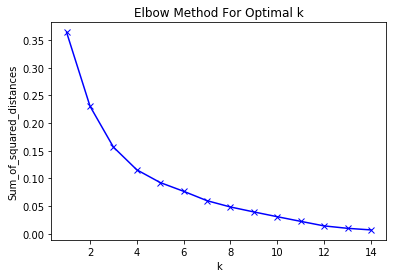

In [26]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Looks like the elbow point for the **optimal K value is around 4**, so lets take that as our value.

In [27]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mk_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 2, 0, 3, 1, 3, 3, 0], dtype=int32)

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mk_merged = mk_geo_df

# merge mk_grouped with mk_geo_data to add latitude/longitude for each borough
mk_merged = mk_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

mk_merged.head() # check the last columns!

,Postcode,Town,Borough,Local authority area(s),lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,MK1,MILTON KEYNES,"Denbigh, Mount Farm",Milton Keynes,52.007169,-0.727622,1,Café,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Indian Restaurant,Italian Restaurant,Asian Restaurant,Coffee Shop,Turkish Restaurant,Sandwich Place
1,MK2,MILTON KEYNES,"Brickfields, Central Bletchley, Fenny Stratfor...",Milton Keynes,51.991884,-0.725566,1,Fast Food Restaurant,Café,Pizza Place,Chinese Restaurant,Coffee Shop,Indian Restaurant,Restaurant,Sandwich Place,Italian Restaurant,Asian Restaurant
2,MK3,MILTON KEYNES,"Church Green, Far Bletchley, Old Bletchley, Ne...","Milton Keynes, Aylesbury Vale",51.995494,-0.750159,1,Café,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Italian Restaurant,Turkish Restaurant,Coffee Shop,Asian Restaurant,Indian Restaurant,Sandwich Place
3,MK4,MILTON KEYNES,"Emerson Valley, Furzton, Kingsmead, Oxley Park...","Milton Keynes, Aylesbury Vale",52.004916,-0.776778,1,Chinese Restaurant,Café,Fast Food Restaurant,Pizza Place,Food Truck,Fish & Chips Shop,Restaurant,Indian Restaurant,Italian Restaurant,Portuguese Restaurant
4,MK5,MILTON KEYNES,"Crownhill, Elfield Park, Grange Farm, Oakhill,...",Milton Keynes,52.019522,-0.776946,0,Coffee Shop,Sandwich Place,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Steakhouse,Asian Restaurant,Italian Restaurant,Restaurant,Food Truck


In [29]:
# create map
mk_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mk_merged['lat'], mk_merged['long'], mk_merged['Borough'], mk_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=50,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.25).add_to(mk_clusters)
mk_clusters.save(outfile= "mk_cluster01.html")       
mk_clusters

<h3>Results

<h3> Cluster 1 - Coffee Shops and Fast Food if you have time to stop</h3>

This is where you want to go to just hang out, be cool, meet your freinds and socialise over lunch or a coffee.  Plenty of coffee shops and places to eat.  This place is dominated by coffee shops, fast food and sandwich places.

* MK5, Crownhill, Elfield Park, Grange Farm, Oakhill, Knowlhill, Loughton, Medbourne, Shenley Brook End, Shenley Church End, Shenley Lodge, Shenley Wood
* MK6, Ashland, Beanhill, Bleak Hall, Coffee Hall, Eaglestone, Fishermead, Leadenhall, Netherfield, Oldbrook, Peartree Bridge, Redmoor, Springfield, Tinkers Bridge, Woughton on the Green, Woughton Park, Simpson, Winterhill
* MK9, Central Milton Keynes, Campbell Park
* MK13 Bancroft/Bancroft Park, Blue Bridge, Bradwell and Bradwell Abbey, Bradwell Common, New Bradwell, Heelands, Stonebridge
* MK14, Blakelands, Conniburrow, Downs Barn, Giffard Park, Great Linford, Linford Wood, Oakridge Park, Stantonbury, Neath Hill, Redhouse Park

In [30]:
mk_merged.loc[mk_merged['Cluster Labels'] == 0, mk_merged.columns[[1] + [0] + list(range(5, mk_merged.shape[1]))]]

,Town,Postcode,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,MILTON KEYNES,MK5,-0.776946,0,Coffee Shop,Sandwich Place,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Steakhouse,Asian Restaurant,Italian Restaurant,Restaurant,Food Truck
5,MILTON KEYNES,MK6,-0.739299,0,Coffee Shop,Restaurant,Fast Food Restaurant,Sandwich Place,Breakfast Spot,Fish & Chips Shop,Food Truck,Café,Indian Restaurant,Burger Joint
8,MILTON KEYNES,MK9,-0.750867,0,Coffee Shop,Fast Food Restaurant,Restaurant,Sandwich Place,Fish & Chips Shop,Food Truck,Indian Restaurant,Italian Restaurant,Breakfast Spot,Burger Joint
12,MILTON KEYNES,MK13,-0.789564,0,Coffee Shop,Fast Food Restaurant,Sandwich Place,Fish & Chips Shop,Indian Restaurant,Burger Joint,Pizza Place,Restaurant,Breakfast Spot,Turkish Restaurant
13,MILTON KEYNES,MK14,-0.768787,0,Coffee Shop,Fast Food Restaurant,Sandwich Place,Restaurant,Burger Joint,Breakfast Spot,Sushi Restaurant,Asian Restaurant,Latin American Restaurant,Fish & Chips Shop


<h3> Cluster 2 - World Foods at your fingertips</h3>

This is where you want to go to find a range of Fast Food and restaurants covering a diverse range of cuisines.

* MK1, Denbigh, Mount Farm
* MK2, Brickfields, Central Bletchley, Fenny Stratford, Water Eaton
* MK3, Church Green, Far Bletchley, Old Bletchley, Newton Leys, West Bletchley
* MK4, Emerson Valley, Furzton, Kingsmead, Oxley Park, Shenley Brook End, Snelshall West, Tattenhoe, Tattenhoe Park, Westcroft, Whaddon, Woodhill
* MK17, Aspley Guise, Battlesden, Bow Brickhill, Drayton Parslow, Eversholt, Great Brickhill, Great Horwood, Hulcote, Little Brickhill, Little Horwood, Milton Bryan, Mursley, Nash, Newton Longville, Potsgrove, Salford, Stoke Hammond, Swanbourne, Thornton, * * Tingrith, Wavendon, Whaddon, Woburn, Woburn Sands

In [31]:
mk_merged.loc[mk_merged['Cluster Labels'] == 1, mk_merged.columns[[1] + [0] + list(range(5, mk_merged.shape[1]))]]

,Town,Postcode,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,MILTON KEYNES,MK1,-0.727622,1,Café,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Indian Restaurant,Italian Restaurant,Asian Restaurant,Coffee Shop,Turkish Restaurant,Sandwich Place
1,MILTON KEYNES,MK2,-0.725566,1,Fast Food Restaurant,Café,Pizza Place,Chinese Restaurant,Coffee Shop,Indian Restaurant,Restaurant,Sandwich Place,Italian Restaurant,Asian Restaurant
2,MILTON KEYNES,MK3,-0.750159,1,Café,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Italian Restaurant,Turkish Restaurant,Coffee Shop,Asian Restaurant,Indian Restaurant,Sandwich Place
3,MILTON KEYNES,MK4,-0.776778,1,Chinese Restaurant,Café,Fast Food Restaurant,Pizza Place,Food Truck,Fish & Chips Shop,Restaurant,Indian Restaurant,Italian Restaurant,Portuguese Restaurant
15,MILTON KEYNES,MK17,-0.699289,1,Fast Food Restaurant,Café,Indian Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant,Sandwich Place,Fish & Chips Shop,Restaurant,Italian Restaurant


<h3> Cluster 3 - Curry Central</h3>

There are some awesome Indian Restaurants in and around Milton Keynes, and you will find them in these areas;

* MK11, Fairfields, Fullers Slade, Galley Hill, Kiln Farm, Stony Stratford
* MK12, Greenleys, Hodge Lea, Old Wolverton, Stacey Bushes, Wolverton, Wolverton Mill
* MK19, Beachampton, Calverton, Castlethorpe Cosgrove, Deanshanger, Hanslope, Haversham, Little Linford, Long Street, Old Stratford, Passenham, Upper Weald, Wicken


In [32]:
mk_merged.loc[mk_merged['Cluster Labels'] == 2, mk_merged.columns[[1] + [0] + list(range(5, mk_merged.shape[1]))]]

,Town,Postcode,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,MILTON KEYNES,MK11,-0.835747,2,Indian Restaurant,Fast Food Restaurant,Fish & Chips Shop,Coffee Shop,Café,Pizza Place,Chinese Restaurant,Sandwich Place,Pub,Bakery
11,MILTON KEYNES,MK12,-0.817932,2,Indian Restaurant,Fast Food Restaurant,Fish & Chips Shop,Coffee Shop,Chinese Restaurant,Middle Eastern Restaurant,Bakery,Sandwich Place,Pub,Pizza Place
16,MILTON KEYNES,MK19,-0.851795,2,Indian Restaurant,Pizza Place,Sandwich Place,Coffee Shop,Chinese Restaurant,Café,Fast Food Restaurant,Middle Eastern Restaurant,Pub,Fish & Chips Shop


<h3> Cluster 4 - Relax, Chill, & Dine</h3>

There are some awesome Indian Restaurants in and around Milton Keynes, and you will find them in these areas.  On the surface, this looks similar to Cluster 1, but when you look a litte deeper you find that its actually dominated by a range of restaurants, and less frequency of fast food.   In otherwords, you go here to find the best restaurants.

* MK7, Browns Wood, Caldecotte, Kents Hill, Tilbrook, Walton, Walton Hall, Wavendon, Wavendon Gate, Old Farm Park
* MK8, Crownhill, Grange Farm, Great Holm, Hazeley, Loughton, Loughton Lodge, Two Mile Ash, Whitehouse, Wymbush
* MK10, Brinklow, Broughton, Kingston, Middleton, Monkston, Oakgrove
* MK15, Bolbeck Park, Downhead Park, Fox Milne, Newlands, Pennyland, Pineham, Northfield, Tongwell, Willen Park, Willen, Willen Lake, Great Woolstone, Little Woolstone


In [33]:
mk_merged.loc[mk_merged['Cluster Labels'] == 3, mk_merged.columns[[1] + [0] + list(range(5, mk_merged.shape[1]))]]

,Town,Postcode,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,MILTON KEYNES,MK7,-0.692578,3,Fast Food Restaurant,Coffee Shop,Café,Restaurant,Sandwich Place,Chinese Restaurant,Fish & Chips Shop,American Restaurant,Gastropub,Indian Restaurant
7,MILTON KEYNES,MK8,-0.808131,3,Coffee Shop,Fish & Chips Shop,Café,Sandwich Place,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Food Truck,Steakhouse,Turkish Restaurant
9,MILTON KEYNES,MK10,-0.695734,3,Coffee Shop,Chinese Restaurant,Café,Restaurant,Sandwich Place,Gastropub,Fish & Chips Shop,Food Truck,Indian Restaurant,Pizza Place
14,MILTON KEYNES,MK15,-0.726404,3,Coffee Shop,Sandwich Place,Burger Joint,Fish & Chips Shop,Food Truck,Ice Cream Shop,Pizza Place,Restaurant,Fast Food Restaurant,English Restaurant


<h3>Discussion</h3>

So does this analysis answer the question?  **Where to go in smaller cities when there are no-online guides?**
...and **whether data science could teach me a thing a or two about the place I have lived in for the last 25 years?** 

I think the answer is a clear **YES**

Having lived in Milton Keynes for over 25 years, this exercise has taught me somethings I didn't know, and confirmed other things I already assumed.  I also didn't know that we have so many coffee shops, that we have a few areas of the city that totally dominated by them, and there are certain areas of the city you go to for certain cuisines.  Has the application of Data Science analysis to my home been insightful - YES, but also its been really interesting, and frankly quite easy to do so (once you know the methodolgy and techniques).

Also, I did iterate around a number of different sized data sets, increasing the area for inspection (by including the areas of Buckingham, Bedford, Olney etc), and also increasing the range of venues retrieved from Foursquare.  My conclusions in doing so, it didn't really bring new insight, and in some circumstances reduced the number of optimal recommended clusters to just 2.  Adding in more data, or broadening out the range of the search just didn't bring in new statistically relevent information generating new insights.  Broadly I considered this as just adding more noise to the signals already in the data.   Therefore I converged around a dataset that comprised of the core postcodes within Milton Keynes, and just the food/restaurant venues.  This presented the most useful results.

---

<h3>Conclusion

In terms of answering the business problem, we draw the following answers;

* The best places to go to for Fast food, Sandwiches and Coffee Shops can be found in MK9, MK5, MK6 - essentally the Centre of Milton Keynes.

* You will find the most Indian Restaurants in MK11, MK12, and MK19 - especially in Stoney Stratford.

* If you want a choice of world food cuisines, head for MK1, MK2, MK3

* When you want to take your time, relax, chillout and have lunch or dinner in range of good restaurants, head for MK7, MK8, MK10 - especially Woburn Sands.

I think there are multiple conclusions that can be drawn from this exercise, that cover both the intenton of the analysis, but also the journey to get to the outcomes.

1. Can you easily use Data Science to determine the best areas of a city to go to when there are no guides or webistes available - **YES!**
2. Is this easily re-producable for other cities?  **YES** and its actually quite easy to do so.  You only need the regions/boroughs, and a way to get the lattitude and longitudes to follow the same process.
3. Can Data Science teach me a thing or two about my home town, and strangle the answer has to be **YES**.  I never knew we had so many places to go to eat, that some areas are so dominated by coffee bars.   But equally, it confirmed the areas where you should go to find the best Indian Restaurants.
4. Can you operate these techniques on smaller cities that don't have the massive depth and range of data available.  Again, **YES** as my analysis for Milton Keynes shows.

In terms of the journey of exploring this business problems, what i discovered is how easy it is to both obtain data on pretty much any topics you like, the power of dataframes to be able to manipulate and clean the data so that you can derive insights from it.There are also some really powerful libraries that make visualisation straight forward, and algorithms in libraries that would take weeks (or more) if i were to code them in C++ or whatever language is de jour!